In [4]:
import os
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
# Link compartilhável do Google Drive para baixar o Dataset
drive_url = 'https://drive.google.com/uc?id=14m-2aCSFKtjossZPNmrPMBjiao2KxnrO'


gdown.download(drive_url, 'arquivo.csv')

path= os.path.join('.', 'arquivo.csv')

Downloading...
From: https://drive.google.com/uc?id=14m-2aCSFKtjossZPNmrPMBjiao2KxnrO
To: /content/arquivo.csv
100%|██████████| 7.41M/7.41M [00:00<00:00, 220MB/s]


In [5]:
df= pd.read_csv(path)
df.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit",
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)
#Possíveis outliers
df= df[df['age'] >=18 ]
df= df[df['NumberOfTime30-59DaysPastDueNotWorse']<96  ]
df= df[df.iloc[:, 11]<15]

df.dropna(inplace=True)
df_x= df.drop(['SeriousDlqin2yrs', 'ID'], axis=1)
df_y= df["SeriousDlqin2yrs"]

df_x.head()

,balance_divided_creditlimit,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### **POPULATION distruibution**

14.417115979485258


Text(0.5, 0, 'Age | mean = 51.31')

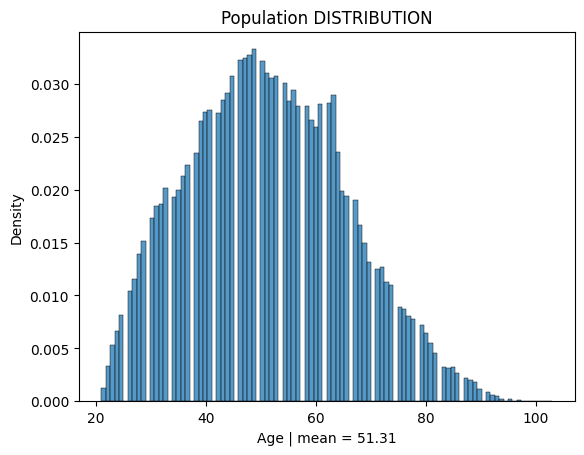

In [195]:
#POPULATION distribution
media_populacao = df['age'].mean()
desvio_populacao = df['age'].std()
print(desvio_populacao)
dados_artificiais = np.random.normal(loc=media_populacao, scale=desvio_populacao, size=1000)
#dados_artificiais, media, desvio
plt.Figure([10,5])
plt.title("Population DISTRIBUTION")
sns.histplot(df['age'], stat='density', label='dados reais')
plt.xlabel(f'Age | mean = {media_populacao:.2f}')


### **Sample distruibution**

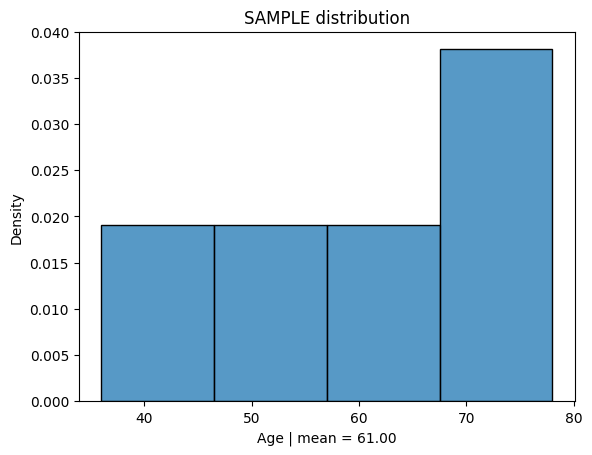

In [197]:
one_sample= df['age'].sample(5)

plt.Figure([10,5])
plt.title("SAMPLE distribution")
sns.histplot(one_sample, stat='density', )
plt.xlabel(f'Age | mean = {one_sample.mean():.2f}')
plt.show()

### **Sampling distribution**

Text(0.5, 0, 'Média dos samples: 50.82')

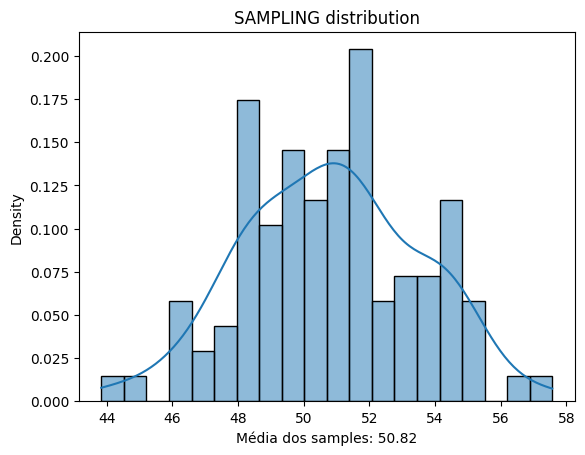

In [80]:
dt= df['age']
sample_size= 30   #num qtd em cada amostra
num_samples= 100  #num amostras

media_samples= []
sample_z = []

for i in range(num_samples):
  sample= dt.sample(sample_size)
  media_samples.append(sample.mean())

  z_score= (media_populacao - sample.mean())/(desvio_populacao/np.sqrt(sample_size))
  sample_z.append(z_score)


plt.Figure([10,5])
plt.title("SAMPLING distribution")
sns.histplot(media_samples, kde=True, stat='density', bins=20)
plt.xlabel(f"Média dos samples: {np.mean(media_samples):.2f}")



### **Possíveis eventos:**

Probabilidade de uma pessoa ter mais de 58 anos?

In [218]:
def z_score(X, media, desvio):
  return ((X - media)/desvio)
X= 58
print(f'{(1 - norm.cdf(z_score(X, media_populacao, desvio_populacao)))*100:.2f}', "%")

32.13 %


Probabilidade de uma pessoa ter menos de 75 anos?

In [223]:
X= 75
print(f'{(norm.cdf(z_score(X, media_populacao, desvio_populacao)))*100:.2f}', "%")

94.98 %
